# Analyze the time-series data from the pi
Load in the data, plot it.

From some tests done on the 12/25:

- pin 7 is the dwell/feed sensor
- pin 11 is the "room" sensor

## Initalize

In [22]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Load Data

In [107]:
def parse_file_line(line):
    '''Parse a line of the input file'''
    line = line.strip('\0')
    split = line.rfind(':')
    
    date_time = datetime.strptime(line[:split], "%Y-%m-%d %H:%M:%S.%f")
    value = int(line[split+1:])
    return (date_time, value)

def load_file(file_path):
    '''Load the time series data from a particular file'''
    with open(file_path, "r") as infile:
        dlist = [parse_file_line(line) for line in infile]
    
    return pd.DataFrame(dlist, columns=['Time', 'PinValue'])


In [126]:
pin07_data = load_file('pin-7-2017-12-25.log')
pin11_data = load_file('pin-11-2017-12-25.log')

## Basic Timeseries Plots

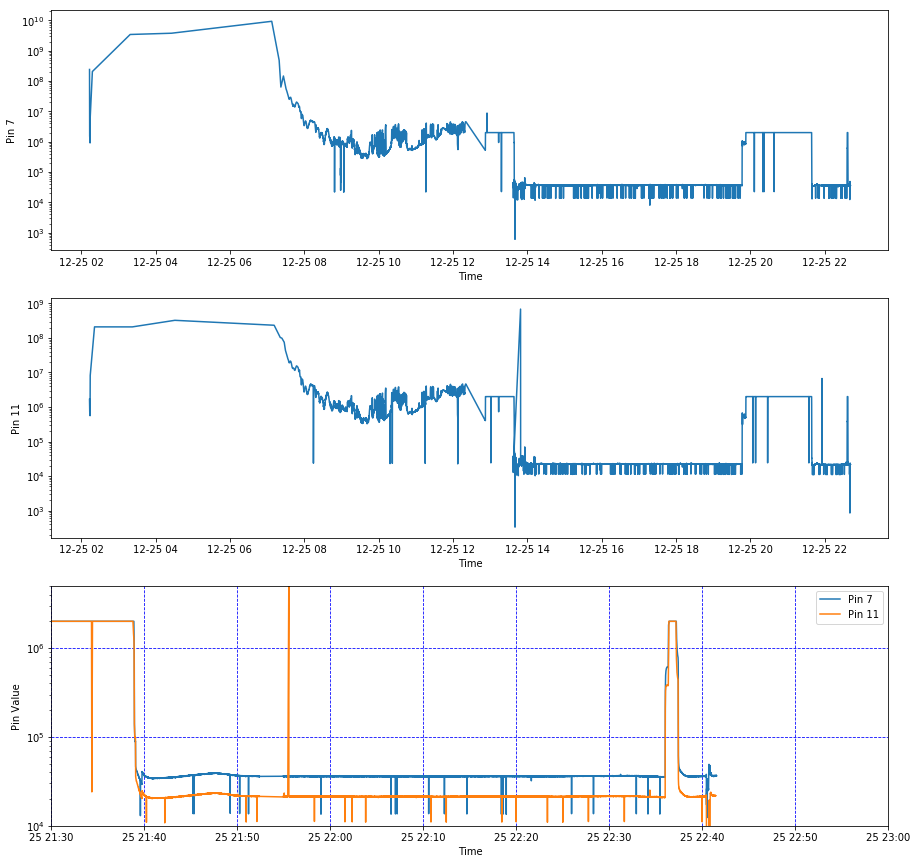

In [127]:
fig = plt.figure(figsize=(15,15))
ax = plt.subplot(311)
ax.plot(pin07_data.Time, pin07_data.PinValue)
ax.set_yscale('log')
ax.set_xlabel('Time')
ax.set_ylabel('Pin 7')

ax = plt.subplot(312)
ax.plot(pin11_data.Time, pin11_data.PinValue)
ax.set_yscale('log')
ax.set_xlabel('Time')
ax.set_ylabel('Pin 11')

ax = plt.subplot(313)
ax.plot(pin07_data.Time, pin07_data.PinValue, label='Pin 7')
ax.plot(pin11_data.Time, pin11_data.PinValue, label='Pin 11')
ax.set_yscale('log')
ax.set_ylim(10000, 5000000)
ax.set_xlim(datetime.strptime("2017-12-25 21:30", "%Y-%m-%d %H:%M"), datetime.strptime("2017-12-25 23:00", "%Y-%m-%d %H:%M"))
ax.set_xlabel('Time')
ax.set_ylabel('Pin Value')
ax.grid(b=True, which='major', color='b', linestyle='--')
ax.legend()

plt.show()

## Running average of the data
This is done by samples, not by time, which is unfortunate, but...

In [128]:
def moving_average(a, n=3):
    '''Create a running average of array a'''
    ret = np.cumsum(np.array(a))
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def ds_moving_average(df, n=3, name='AveragePinValue'):
    avg_values = moving_average(df.PinValue, n)
    padded_avg_values = np.append(np.zeros(n-1), avg_values)
    df[name] = pd.Series(padded_avg_values, index=df.index)

In [129]:
window=10
ds_moving_average(pin07_data, window)
ds_moving_average(pin11_data, window)

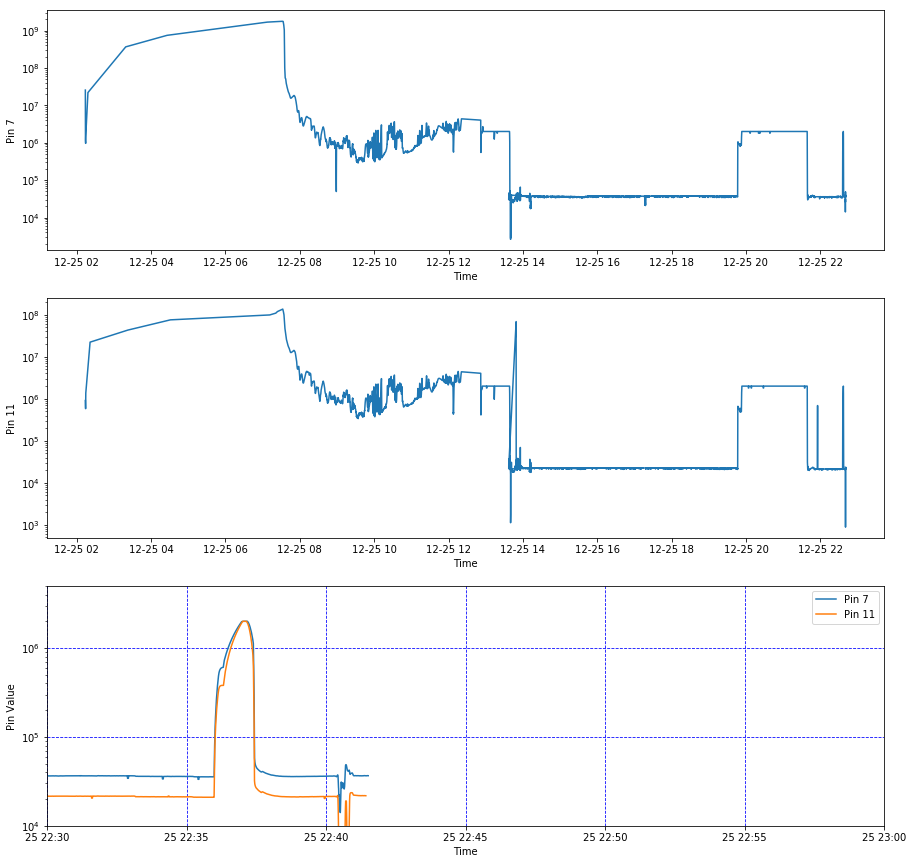

In [131]:
fig = plt.figure(figsize=(15,15))
ax = plt.subplot(311)
ax.plot(pin07_data.Time, pin07_data.AveragePinValue)
ax.set_yscale('log')
ax.set_xlabel('Time')
ax.set_ylabel('Pin 7')

ax = plt.subplot(312)
ax.plot(pin11_data.Time, pin11_data.AveragePinValue)
ax.set_yscale('log')
ax.set_xlabel('Time')
ax.set_ylabel('Pin 11')

ax = plt.subplot(313)
ax.plot(pin07_data.Time, pin07_data.AveragePinValue, label='Pin 7')
ax.plot(pin11_data.Time, pin11_data.AveragePinValue, label='Pin 11')
ax.set_yscale('log')
ax.set_ylim(10000, 5000000)
ax.set_xlim(datetime.strptime("2017-12-25 22:30", "%Y-%m-%d %H:%M"), datetime.strptime("2017-12-25 23:00", "%Y-%m-%d %H:%M"))
ax.set_xlabel('Time')
ax.set_ylabel('Pin Value')
ax.grid(b=True, which='major', color='b', linestyle='--')
ax.legend()

plt.show()